In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
# Load the training and testing data
train_path = '/content/Google_train_data.csv'
test_path = '/content/Google_test_data.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [11]:
# Display first few rows of training data
print("Training Data:")
print(train_data.head())

Training Data:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [12]:
# Display first few rows of testing data
print("\nTesting Data:")
print(test_data.head())


Testing Data:
         Date         Open         High          Low        Close  \
0  2018-08-13  1236.979980  1249.272949  1233.640991  1235.010010   
1  2018-08-14  1235.189941  1245.869995  1225.109985  1242.099976   
2  2018-08-15  1229.260010  1235.239990  1209.510010  1214.380005   
3  2018-08-16  1224.729980  1226.000000  1202.550049  1206.489990   
4  2018-08-17  1202.030029  1209.020020  1188.239990  1200.959961   

     Adj Close   Volume  
0  1235.010010   997300  
1  1242.099976  1348100  
2  1214.380005  1828800  
3  1206.489990  1343200  
4  1200.959961  1389600  


In [13]:
# Basic information and summary statistics
print("\nTraining Data Info:")
print(train_data.info())
print("\nTraining Data Description:")
print(train_data.describe())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None

Training Data Description:
              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000


In [14]:
print("\nTesting Data Info:")
print(test_data.info())
print("\nTesting Data Description:")
print(test_data.describe())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None

Testing Data Description:
              Open         High          Low        Close    Adj Close  \
count   252.000000   252.000000   252.000000   252.000000   252.000000   
mean   1131.925615  1143.037319  1120.368111  1131.963092  1131.963092   
std      64.187732    61.947013    66.312745    64.872818    64.872818   
min     973.900024  1003.539978   970.109985   976.219971   976.219971   
25%    1079.867493  1092.682464  1068.087525  1079.

In [15]:
# Checking for missing values
print("\nMissing values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing values in Testing Data:")
print(test_data.isnull().sum())


Missing values in Training Data:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Missing values in Testing Data:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [16]:
# Preprocess the 'Volume' and 'Close' columns to remove commas and convert to numeric
train_data['Volume'] = train_data['Volume'].astype(str).str.replace(',', '').astype(float)
train_data['Close'] = train_data['Close'].astype(str).str.replace(',', '').astype(float)
test_data['Volume'] = test_data['Volume'].astype(str).str.replace(',', '').astype(float)
test_data['Close'] = test_data['Close'].astype(str).str.replace(',', '').astype(float)
test_data['Adj Close'] = test_data['Adj Close'].astype(str).str.replace(',', '').astype(float)

In [17]:
# Drop the Date column
train_data = train_data.drop(columns=['Date'])
test_data = test_data.drop(columns=['Date'])

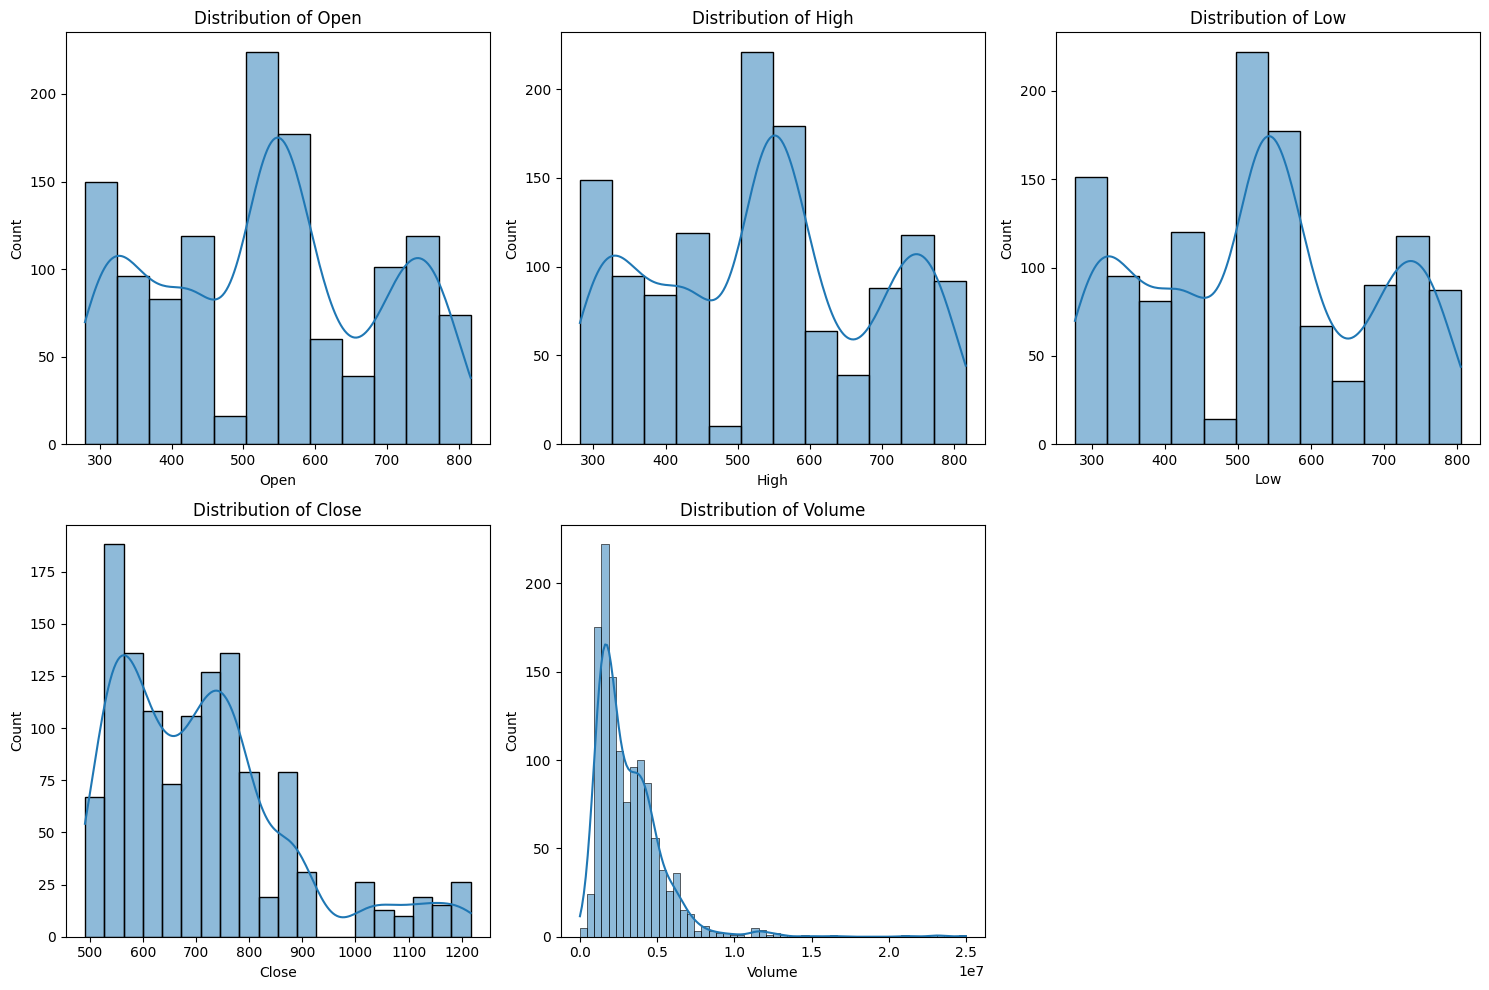

In [18]:
# Plot distributions of numerical features
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

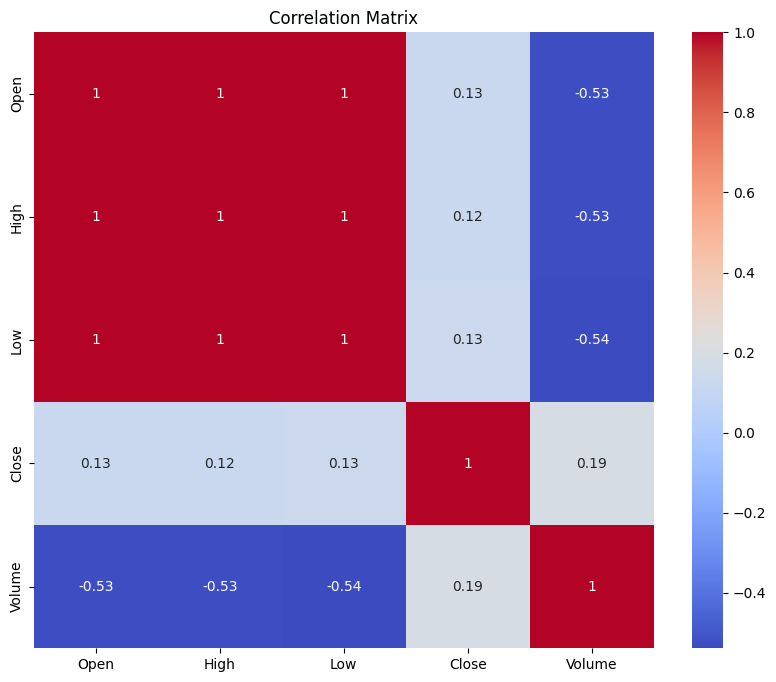

In [19]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

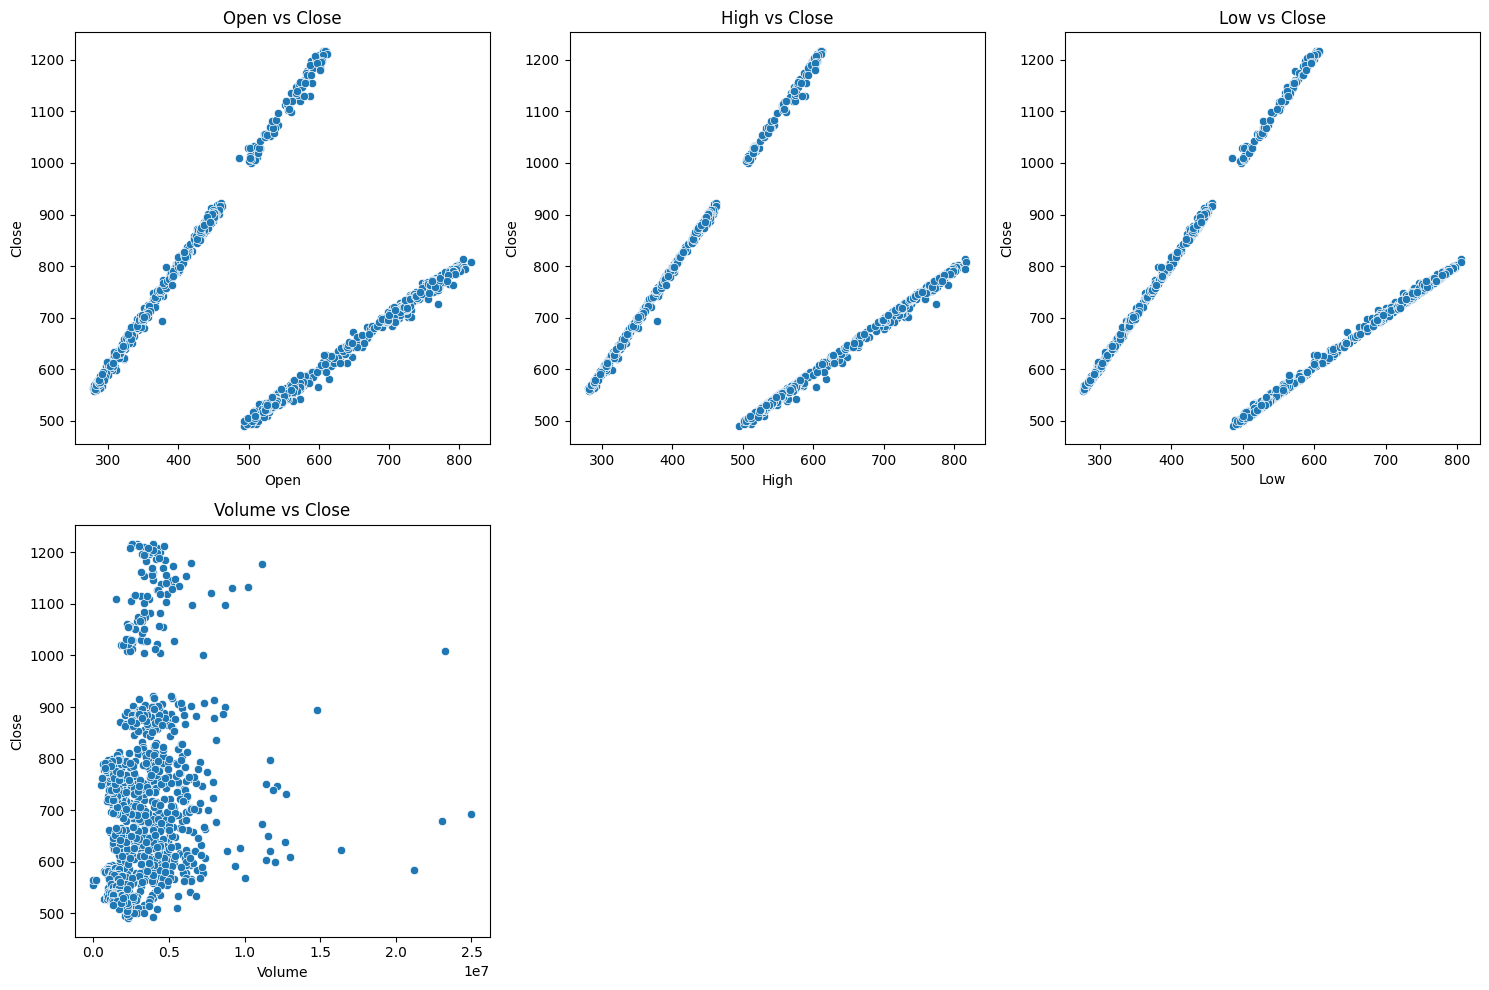

In [20]:
# Scatter plots to see relationships between features and target
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Open', 'High', 'Low', 'Volume']):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=train_data[column], y=train_data['Close'])
    plt.title(f'{column} vs Close')

plt.tight_layout()
plt.show()

In [21]:
# Separate features and target variable in training data
X_train = train_data.drop(columns=['Close'])
y_train = train_data['Close']

In [22]:
# Separate features and target variable in testing data
X_test = test_data.drop(columns=['Close', 'Adj Close'])
y_test = test_data['Close']

In [23]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Calculate custom accuracy
def custom_accuracy(y_true, y_pred):
    return np.mean(1 - np.abs((y_true - y_pred) / y_true))

accuracy = custom_accuracy(y_test, y_pred)
print(f'Custom Accuracy: {accuracy:.4f}')

Custom Accuracy: 0.7685


In [26]:
# Evaluate model performance using standard metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 260.14
Mean Squared Error (MSE): 79588.62
Root Mean Squared Error (RMSE): 282.11


In [27]:
# Function to make predictions with new input data
def predict_new(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame(input_data, index=[0])

    # Make prediction
    prediction = model.predict(input_df)
    return prediction[0]

In [28]:
# Example input data
new_input = {
    'Open': 1500,
    'High': 1520,
    'Low': 1480,
    'Volume': 1200000
}

# Make a prediction with the new input data
predicted_close = predict_new(new_input)
print(f'Predicted Close Price: {predicted_close:.2f}')

Predicted Close Price: 892.13
